In [29]:
# 生成非线性分类数据

import numpy as np
import pandas as pd


n = 40
np.random.seed(2044)
X = np.c_[np.random.uniform(-1.5, 1.5, size=n).reshape(-1, 1),
          np.random.uniform(-1.5, 1.5, size=n).reshape(-1, 1)]
# 在单位圆圈内，Y=1，否则Y=0
Y = ((X ** 2).sum(axis=1, keepdims=True) <= 1) + 0
data = np.concatenate((Y, X), axis=1)
data = pd.DataFrame(data, columns=["y", "x1", "x2"])

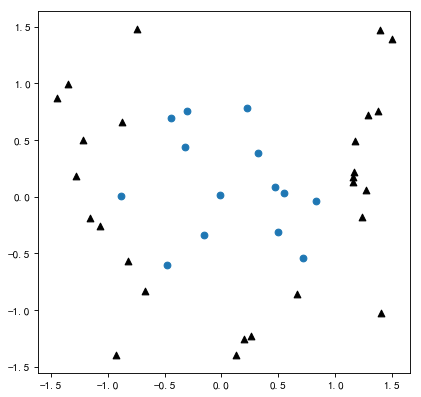

In [30]:
# 可视化数据

import matplotlib.pyplot as plt


## 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=80)
## 确保图形中负号显示正确
plt.rcParams['axes.unicode_minus']=False
label1 = data[data["y"]>0]
plt.scatter(label1[["x1"]], label1[["x2"]], marker="o")
label0 = data[data["y"]==0]
plt.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")

In [31]:
# 可视化模型结果

def visualize(data, res):
    """
    将模型结果可视化
    """
    # 创建一个图形框
    fig = plt.figure(figsize=(12, 6), dpi=80)
    # 在图形框里画两幅图
    ax = fig.add_subplot(1, 2, 1)
    label1 = data[data["y"]>0]
    ax.scatter(label1[["x1"]], label1[["x2"]], marker="o")
    label0 = data[data["y"]==0]
    ax.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")
    # 画成模型的分离直线和分离边界
    ## 得到平面上所有点的组合
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1, x2)
    # 模型结果
    ## 计算平面上点的到分离直线的“距离”
    pred = res.decision_function(np.c_[X1.ravel(), X2.ravel()])
    pred = pred.reshape(X1.shape)
    ax.contour(X1, X2, pred, levels=[-1, 0, 1], colors=["r", "r", "r"],
        linestyles=["--", "-", "--"])
    ## 用灰色表示预测结果等于“三角形”
    ax.contourf(X1, X2, pred, levels=[-100, 0], colors=["gray"], alpha=0.4)
    plt.show()

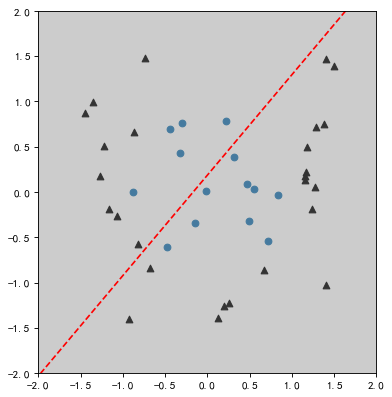

In [32]:
# Linear_kernel

from sklearn.svm import SVC
from sklearn.metrics.pairwise import linear_kernel


model = SVC(kernel=linear_kernel)
model.fit(data[["x1", "x2"]], data["y"])
visualize(data, model)

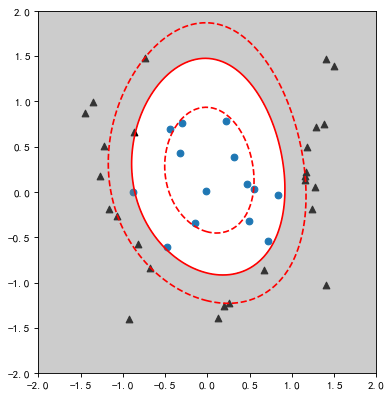

In [33]:
# polynomial_kernel

from sklearn.metrics.pairwise import polynomial_kernel


model = SVC(kernel=polynomial_kernel, degree=4, coef0=1, gamma=2)
model.fit(data[["x1", "x2"]], data["y"])
visualize(data, model)

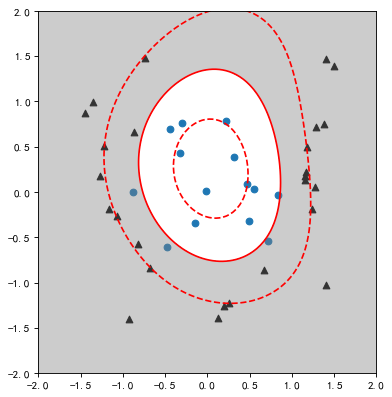

In [34]:
# rbf_kernel

from sklearn.metrics.pairwise import rbf_kernel


model = SVC(kernel=rbf_kernel, gamma=1)
model.fit(data[["x1", "x2"]], data["y"])
visualize(data, model)

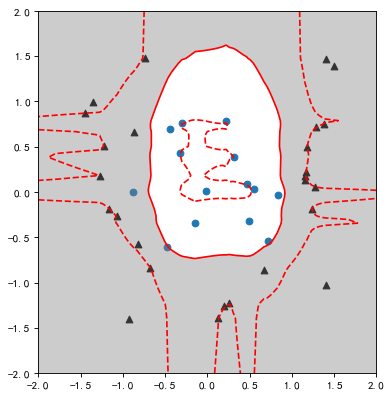

In [35]:
# rbf_kernel

from sklearn.metrics.pairwise import laplacian_kernel


model = SVC(kernel=laplacian_kernel, gamma=2)
model.fit(data[["x1", "x2"]], data["y"])
visualize(data, model)